#### Exercise 1 - Kaggle Big Dataset - Reviews

### Important Libraries

In [136]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml


#sklearn
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer,balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import GridSearchCV,KFold

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
    
from sklearn.pipeline import Pipeline


### Loading the data

In [137]:
# train data
reviews_train = pd.read_csv('data/reviews/amazon_review_ID.shuf.lrn.csv')

#test data

X_test = pd.read_csv('data/reviews/amazon_review_ID.shuf.tes.csv')


# test result

y_test =  pd.read_csv('data/reviews/amazon_review_ID.shuf.sol.ex.csv')

### Data Preprocessing and Exploration

In [138]:
# Number of samples and number of attributes
num_samples = reviews_train.shape[0]
num_attributes = reviews_train.shape[1] - 1 # last one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  750
The number of attributes is:  10001


In [139]:
# checking for null values
reviews_train.isna().sum()

ID        0
V1        0
V2        0
V3        0
V4        0
         ..
V9997     0
V9998     0
V9999     0
V10000    0
Class     0
Length: 10002, dtype: int64

In [140]:
#print number of unknown values:
num_unknown = 0
for n in reviews_train.columns:
  num_unknown_per_feature = reviews_train.loc[:,n].isin(['unknown']).sum(axis=0)
  num_unknown += num_unknown_per_feature
  print(n, ':', num_unknown_per_feature)
print('total unknown:', num_unknown)



ID : 0
V1 : 0
V2 : 0
V3 : 0
V4 : 0
V5 : 0
V6 : 0
V7 : 0
V8 : 0
V9 : 0
V10 : 0
V11 : 0
V12 : 0
V13 : 0
V14 : 0
V15 : 0
V16 : 0
V17 : 0
V18 : 0
V19 : 0
V20 : 0
V21 : 0
V22 : 0
V23 : 0
V24 : 0
V25 : 0
V26 : 0
V27 : 0
V28 : 0
V29 : 0
V30 : 0
V31 : 0
V32 : 0
V33 : 0
V34 : 0
V35 : 0
V36 : 0
V37 : 0
V38 : 0
V39 : 0
V40 : 0
V41 : 0
V42 : 0
V43 : 0
V44 : 0
V45 : 0
V46 : 0
V47 : 0
V48 : 0
V49 : 0
V50 : 0
V51 : 0
V52 : 0
V53 : 0
V54 : 0
V55 : 0
V56 : 0
V57 : 0
V58 : 0
V59 : 0
V60 : 0
V61 : 0
V62 : 0
V63 : 0
V64 : 0
V65 : 0
V66 : 0
V67 : 0
V68 : 0
V69 : 0
V70 : 0
V71 : 0
V72 : 0
V73 : 0
V74 : 0
V75 : 0
V76 : 0
V77 : 0
V78 : 0
V79 : 0
V80 : 0
V81 : 0
V82 : 0
V83 : 0
V84 : 0
V85 : 0
V86 : 0
V87 : 0
V88 : 0
V89 : 0
V90 : 0
V91 : 0
V92 : 0
V93 : 0
V94 : 0
V95 : 0
V96 : 0
V97 : 0
V98 : 0
V99 : 0
V100 : 0
V101 : 0
V102 : 0
V103 : 0
V104 : 0
V105 : 0
V106 : 0
V107 : 0
V108 : 0
V109 : 0
V110 : 0
V111 : 0
V112 : 0
V113 : 0
V114 : 0
V115 : 0
V116 : 0
V117 : 0
V118 : 0
V119 : 0
V120 : 0
V121 : 0
V122 : 0
V12

In [141]:
reviews_train.dtypes

ID         int64
V1         int64
V2         int64
V3         int64
V4         int64
           ...  
V9997      int64
V9998      int64
V9999      int64
V10000     int64
Class     object
Length: 10002, dtype: object

In [142]:
# # Plotting the categorical variables
# categorical_columns = reviews_train.columns.difference(['ID','Class'])

In [143]:
# plt.figure(figsize=(20,30))
# for i,column in enumerate(categorical_columns):
#     plt.subplot(4, 4, i+1)
#     sns.histplot(x=congress_train[column],hue =congress_train['class'],multiple = 'stack')
#     plt.xlabel(column)
#     plt.xticks(rotation=90)
# plt.suptitle("Distribution between the 2 classes ", fontsize=20)
# plt.show()

##### Preparing data for model fitting

In [144]:
# List of possible classes
print("List of unique class labels:",'\n',reviews_train['Class'].unique())
print('\n')
print('Number of unique class labels','\n',reviews_train['Class'].nunique())


List of unique class labels: 
 ['Grove' 'Chell' 'Auken' 'Davisson' 'Vision' 'Harp' 'Calvinnme' 'Vernon'
 'Cutey' 'Hayes' 'Robert' 'Wilson' 'Sherwin' 'Lee' 'Mahlers2nd' 'Merritt'
 'Power' 'Lovitt' 'Peterson' 'Nigam' 'Agresti' 'Comdet' 'Blankenship'
 'Chandler' 'Walters' 'Mark' 'Neal' 'Brody' 'Mitchell' 'Taylor' 'Shea'
 'Chachra' 'Messick' 'Kolln' 'Ashbacher' 'Johnson' 'Koenig' 'Corn' 'Brown'
 'Riley' 'Engineer' 'Lawyeraau' 'Janson' 'McKee' 'Dent' 'Cholette'
 'Goonan' 'CFH' 'Bukowsky' 'Morrison']


Number of unique class labels 
 50


In [145]:
reviews_train['class'] = reviews_train['Class'].factorize()[0]

- As seen below, there is only one unique class in y_test. Therefore, we are going to replace its value with the encoded value that this class has on train.

In [146]:
y_test['Class'].unique()

array(['Wilson'], dtype=object)

In [147]:

reviews_train[reviews_train['Class'] =='Wilson']['class'].unique()

array([11])

In [148]:
y_test['class'] = y_test['Class'].replace('Wilson', 11)

In [149]:
y_test = y_test['class']

In [150]:
y_train = reviews_train['class']
X_train = reviews_train.drop(['ID','Class','class'],axis=1)

In [151]:
X_test = X_test.drop(['ID'],axis=1)

#### Dimensionality Reduction


In [152]:
components = None

pca = PCA(n_components= components)

#performing PCA on the train data

pca.fit(X_train)


PCA()

In [153]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[5.35179264e+01 3.18710754e+00 1.97035258e+00 1.69928852e+00
 1.48913937e+00 1.03737411e+00 9.45538079e-01 8.52124984e-01
 7.95815032e-01 7.41618201e-01 6.84234142e-01 6.27590147e-01
 6.03712641e-01 5.89021440e-01 5.14242195e-01 4.97079356e-01
 4.62893779e-01 4.56019345e-01 4.38235559e-01 4.25189349e-01
 3.94453653e-01 3.93721270e-01 3.88991349e-01 3.70751210e-01
 3.50652792e-01 3.32674527e-01 3.18191700e-01 3.11590735e-01
 3.02006743e-01 2.83973069e-01 2.79621779e-01 2.77888241e-01
 2.67603046e-01 2.64612033e-01 2.54627879e-01 2.49456274e-01
 2.39886152e-01 2.39181468e-01 2.33305304e-01 2.23344124e-01
 2.21804197e-01 2.17415300e-01 2.14097314e-01 2.09026097e-01
 2.07474748e-01 1.98279640e-01 1.91900006e-01 1.89154235e-01
 1.84391037e-01 1.79136976e-01 1.77276015e-01 1.71331223e-01
 1.68903437e-01 1.67853699e-01 1.63799351e-01 1.61599503e-01
 1.59527804e-01 1.56303370e-01 1.54755484e-01 1.52575276e-01
 1.49061347e-01 1.46831297e-01 1.45920590e-01 1.45440012e-01


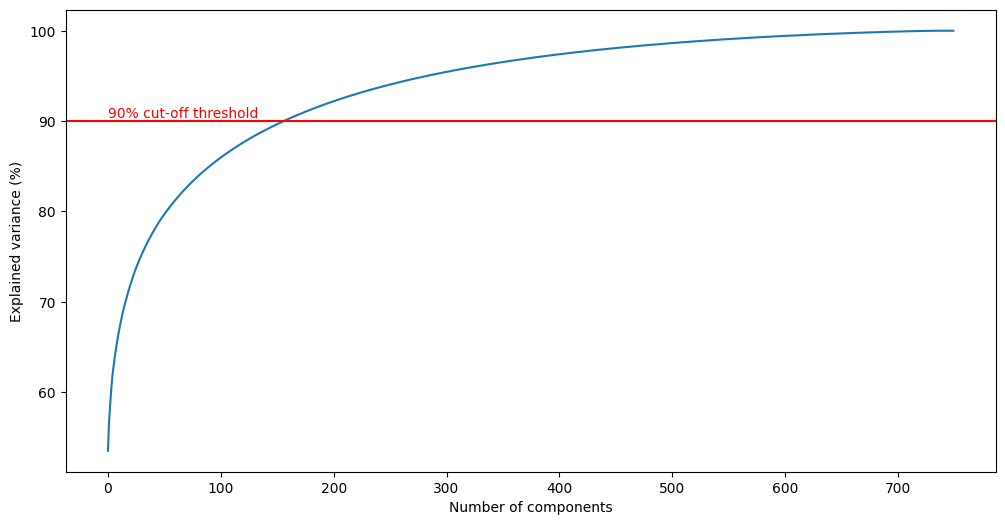

In [154]:
# plot a scree plot
components = components
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.axhline(y=90, color='r', linestyle='-')
plt.text(0.5, 90, '90% cut-off threshold', color = 'red', fontsize=10,verticalalignment = 'bottom')
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

In [187]:
pca = PCA(n_components = 0.85)
pca.fit(X_train)
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

Number of components: 91


In [155]:
# pca_components = abs(pca.components_)
# print('Top 4 most important features in each component')
# print('===============================================')
# for row in range(pca_components.shape[0]):
#     # get the indices of the top 4 values in each row
#     temp = np.argpartition(-(pca_components[row]), 4)
    
#     # sort the indices in descending order
#     indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
#     # print the top 4 feature names
#     print(f'Component {row}: {X_train.columns[indices].to_list()}')

In [188]:
_pca = PCA(n_components = components)
X_train_pca = _pca.fit_transform(X_train)
X_test_pca = _pca.transform(X_test)

#### Decision Tree

##### Tree 1

In [197]:
tree_1 = tree.DecisionTreeClassifier(random_state=1)
tree_1.fit(X_train_pca,y_train)

DecisionTreeClassifier(random_state=1)

In [200]:
def evaluate(model,X_train = X_train_pca,X_test = X_test_pca,y_train = y_train,y_test=y_test):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # accuracy
    print("#"*20)
    print("Accuracy on train: ", accuracy_score(y_true = y_train, y_pred = y_train_predict))
    print("Accuracy on test: ", accuracy_score(y_test, y_test_predict))
    print("#"*20)
    print("Recall on train: ", recall_score(y_true = y_train, y_pred = y_train_predict,average = 'macro'))
    print("Recall on test: ", recall_score(y_true = y_test, y_pred = y_test_predict,average = 'macro'))
    print("#"*20)
    print("Precision on train: ", precision_score(y_true = y_train, y_pred = y_train_predict,average = 'macro'))
    print("Precision on test: ", precision_score(y_true = y_test, y_pred = y_test_predict,average = 'macro'))

      

In [202]:
evaluate(tree_1)


####################
Accuracy on train:  1.0
Accuracy on test:  0.017333333333333333
####################
Recall on train:  1.0
Recall on test:  0.00034666666666666667
####################
Precision on train:  1.0
Precision on test:  0.02


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
rf_1 = RandomForestClassifier(random_state = 1)
rf_1.fit(X_train_pca,y_train)

RandomForestClassifier(random_state=1)

In [204]:
evaluate(rf_1)

####################
Accuracy on train:  1.0
Accuracy on test:  0.03333333333333333
####################
Recall on train:  1.0
Recall on test:  0.0006666666666666666
####################
Precision on train:  1.0
Precision on test:  0.02


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
